# Week3 programming assignment
Data files you will find here https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_3

## FILES at the release
training.csv - all features

check_agreement.csv - all features besides mass for agreement check

check_correlation.csv - all features for correlation check

test.csv - all features besides mass

## Goal

the goal is to design prediction model that will give best score (ROC AUC) and will meet the constraints of 

- similar performance on simulated and real data (agreement check)
- decorrelation with the mass (correlation check)

the predictions over `test.csv` (i.e. submission file) should be sent to coursera for evaluation.

**training.csv**

This is a labelled dataset (the label ‘signal’ being ‘1’ for signal events, ‘0’ for background events) to train the classifier. Signal events have been simulated, while background events are real data.

This real data is collected by the LHCb detectors observing collisions of accelerated particles with a specific mass range in which τ → 3μ can’t happen. We call these events “background” and label them 0.

FlightDistance - Distance between τ and PV (primary vertex, the original protons collision point).

FlightDistanceError - Error on FlightDistance.

mass - reconstructed τ candidate invariant mass, which is absent in the test samples.

LifeTime - Life time of tau candidate.

IP - Impact Parameter of tau candidate.

IPSig - Significance of Impact Parameter.

VertexChi2 - χ2 of τ vertex.

dira - Cosine of the angle between the τ momentum and line between PV and tau vertex. 

pt - transverse momentum of τ.

DOCAone - Distance of Closest Approach between p0 and p1.

DOCAtwo - Distance of Closest Approach between p1 and p2.

DOCAthree - Distance of Closest Approach between p0 and p2.

IP_p0p2 - Impact parameter of the p0 and p2 pair.

IP_p1p2 - Impact parameter of the p1 and p2 pair.

isolationa - Track isolation variable.

isolationb - Track isolation variable.

isolationc - Track isolation variable.

isolationd - Track isolation variable.

isolatione - Track isolation variable.

isolationf - Track isolation variable.

iso - Track isolation variable.

CDF1 - Cone isolation variable.

CDF2 - Cone isolation variable.

CDF3 - Cone isolation variable.

production - source of τ. This variable is absent in the test samples.

ISO_SumBDT - Track isolation variable.

p0_IsoBDT - Track isolation variable.

p1_IsoBDT - Track isolation variable.

p2_IsoBDT - Track isolation variable.

p0_track_Chi2Dof - Quality of p0 muon track.

p1_track_Chi2Dof - Quality of p1 muon track.

p2_track_Chi2Dof - Quality of p2 muon track.

p0_pt - Transverse momentum of p0 muon.

p0_p - Momentum of p0 muon.

p0_eta - Pseudorapidity of p0 muon.

p0_IP - Impact parameter of p0 muon.

p0_IPSig - Impact Parameter Significance of p0 muon.

p1_pt - Transverse momentum of p1 muon.

p1_p - Momentum of p1 muon.

p1_eta - Pseudorapidity of p1 muon.

p1_IP - Impact parameter of p1 muon.

p1_IPSig - Impact Parameter Significance of p1 muon.

p2_pt - Transverse momentum of p2 muon.

p2_p - Momentum of p2 muon.

p2_eta - Pseudorapidity of p2 muon.

p2_IP - Impact parameter of p2 muon.

p2_IPSig - Impact Parameter Significance of p2 muon.

SPDhits - Number of hits in the SPD detector.

min_ANNmuon - Muon identification. LHCb collaboration trains Artificial Neural Networks (ANN) from informations from RICH, ECAL, HCAL, Muon system to distinguish muons from other particles. This variables denotes the minimum of the three muons ANN. min ANNmuon should not be used for training. This variable is absent in the test samples.

signal - This is the target variable for you to predict in the test samples.


In [211]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [212]:
import pandas
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, roc_auc_score

from hep_ml import metrics

# Load dataset and split into training / test

`training.csv` is a mixture of simulated signal, real background.
It has the following columns.

`test.csv` has the following columns:



In [213]:
train_ada = pandas.read_csv('reference/training.csv', sep=',')
test_ada = pandas.read_csv('reference/test.csv', sep=',', index_col='id')

In [214]:
print ("Training full sample columns:", ", ".join(train_ada.columns), "\nShape:", train_ada.shape)

Training full sample columns: id, LifeTime, dira, FlightDistance, FlightDistanceError, IP, IPSig, VertexChi2, pt, DOCAone, DOCAtwo, DOCAthree, IP_p0p2, IP_p1p2, isolationa, isolationb, isolationc, isolationd, isolatione, isolationf, iso, CDF1, CDF2, CDF3, ISO_SumBDT, p0_IsoBDT, p1_IsoBDT, p2_IsoBDT, p0_track_Chi2Dof, p1_track_Chi2Dof, p2_track_Chi2Dof, p0_IP, p1_IP, p2_IP, p0_IPSig, p1_IPSig, p2_IPSig, p0_pt, p1_pt, p2_pt, p0_p, p1_p, p2_p, p0_eta, p1_eta, p2_eta, SPDhits, production, signal, mass, min_ANNmuon 
Shape: (67553, 51)


In [215]:
print ("Test full sample columns:", ", ".join(test_ada.columns), "\nShape:", test_ada.shape)
test_ada.head()

Test full sample columns: LifeTime, dira, FlightDistance, FlightDistanceError, IP, IPSig, VertexChi2, pt, DOCAone, DOCAtwo, DOCAthree, IP_p0p2, IP_p1p2, isolationa, isolationb, isolationc, isolationd, isolatione, isolationf, iso, CDF1, CDF2, CDF3, ISO_SumBDT, p0_IsoBDT, p1_IsoBDT, p2_IsoBDT, p0_track_Chi2Dof, p1_track_Chi2Dof, p2_track_Chi2Dof, p0_IP, p1_IP, p2_IP, p0_IPSig, p1_IPSig, p2_IPSig, p0_pt, p1_pt, p2_pt, p0_p, p1_p, p2_p, p0_eta, p1_eta, p2_eta, SPDhits 
Shape: (855819, 46)


,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,...,p0_pt,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits
id,,,,,,,,,,,,,,,,,,,,,
14711831,0.001273,0.999816,8.569642,0.310039,0.197893,5.183939,2.286117,687.479248,0.022301,0.050763,...,508.926514,306.629456,714.222717,30300.734375,5662.158691,7406.368164,4.779700,3.608334,3.029715,705
16316387,0.000661,0.999954,7.061379,0.348772,0.067430,6.316281,3.865824,5691.845703,0.002455,0.037633,...,943.130676,3287.291260,1563.593994,6160.323730,43781.566406,19728.500000,2.563915,3.280884,3.226650,907
6771382,0.000889,0.999999,6.502967,0.273914,0.011020,0.865816,1.004631,5429.225586,0.002753,0.036379,...,2886.055908,2216.936279,598.068359,26387.134766,15534.978516,6504.145020,2.903129,2.634985,3.077517,213
686045,0.001295,0.999301,7.838184,0.325697,0.388636,11.391245,10.345356,661.717834,0.008163,0.436003,...,461.727753,357.967560,1118.084229,5451.857422,10281.403320,23722.742188,3.160085,4.050494,3.747409,275
8755882,0.001714,0.999805,7.064559,0.113440,0.154421,13.925871,12.951378,3885.417969,0.066317,0.052183,...,1773.747925,1643.278198,711.572205,7724.954590,12830.546875,6008.145996,2.151059,2.744157,2.823017,357


In [216]:
np.unique(train_ada.signal.values)

array([0, 1])

# Train simple model using part of the training sample

In [217]:
def get_safe_balanced_split(target, trainSize=0.8, getTestIndexes=True, shuffle=False, seed=None):
    classes, counts = np.unique(target, return_counts=True)
    nPerClass = float(len(target))*float(trainSize)/float(len(classes))
    if nPerClass > np.min(counts):
        print("Insufficient data to produce a balanced training data split.")
        print("Classes found %s"%classes)
        print("Classes count %s"%counts)
        ts = float(trainSize*np.min(counts)*len(classes)) / float(len(target))
        print("trainSize is reset from %s to %s"%(trainSize, ts))
        trainSize = ts
        nPerClass = float(len(target))*float(trainSize)/float(len(classes))
    # get number of classes
    nPerClass = int(nPerClass)
    print("Data splitting on %i classes and returning %i per class"%(len(classes),nPerClass ))
    # get indexes
    trainIndexes = []
    for c in classes:
        if seed is not None:
            np.random.seed(seed)
        cIdxs = np.where(target==c)[0]
        cIdxs = np.random.choice(cIdxs, nPerClass, replace=False)
        trainIndexes.extend(cIdxs)
    # get test indexes
    testIndexes = None
    if getTestIndexes:
        testIndexes = list(set(range(len(target))) - set(trainIndexes))
    # shuffle
    if shuffle:
        trainIndexes = random.shuffle(trainIndexes)
        if testIndexes is not None:
            testIndexes = random.shuffle(testIndexes)
    # return indexes
    return trainIndexes, testIndexes

In [218]:
#train, test = train_test_split(train_ada, train_size=0.7, random_state=13)
trainIndexes, testIndexes = get_safe_balanced_split(train_ada.signal.values, trainSize=0.7, seed=13)
train = train_ada.iloc[trainIndexes,:]
test = train_ada.iloc[testIndexes,:]

Data splitting on 2 classes and returning 23643 per class


Let's chose features to train a model

In [219]:
variables = list(set(train_ada.columns) - {'id', 'signal', 'mass', 'production', 'min_ANNmuon'})
print (variables)

['LifeTime', 'isolationc', 'pt', 'DOCAthree', 'dira', 'p0_pt', 'p2_track_Chi2Dof', 'p1_IsoBDT', 'iso', 'p1_IPSig', 'p0_IPSig', 'CDF2', 'CDF1', 'DOCAone', 'p2_IsoBDT', 'p1_eta', 'FlightDistanceError', 'DOCAtwo', 'IP', 'VertexChi2', 'p2_IPSig', 'isolationd', 'p0_p', 'IPSig', 'isolationa', 'CDF3', 'isolationb', 'p0_IP', 'IP_p0p2', 'IP_p1p2', 'p0_track_Chi2Dof', 'p2_p', 'isolationf', 'isolatione', 'p1_track_Chi2Dof', 'p1_IP', 'SPDhits', 'p2_IP', 'p1_p', 'p0_eta', 'p1_pt', 'ISO_SumBDT', 'p2_eta', 'FlightDistance', 'p0_IsoBDT', 'p2_pt']


In [220]:
# Estimating parameters

from tune_sklearn import TuneGridSearchCV, TuneSearchCV
########## Tuning
param_dists = {
    'learning_rate':(0.001,0.01),
    'n_estimators':(50,100),
    'base_estimator__max_depth':(10,50),
    'base_estimator__min_samples_leaf':(10,50),
    'base_estimator__max_features':(10,len(variables))
}
gsearch1 = TuneSearchCV(
    estimator = AdaBoostClassifier(random_state=13,
                                   base_estimator=DecisionTreeClassifier(random_state=13)),
    scoring='neg_log_loss', #racall KO, precision KO, accuracy KO
    n_jobs=-1,
    cv=2,
    verbose=1,
    param_distributions=param_dists,
    early_stopping=False,
    max_iters=1,
    search_optimization="bayesian"
)
gsearch1.fit(train[variables],train['signal'])
gsearch1.best_params_["random_state"]=13
print("AdaBoost")
print(gsearch1.best_params_, gsearch1.best_score_)


AdaBoost
{'learning_rate': 0.005955266275358592, 'n_estimators': 58, 'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 46, 'base_estimator__max_features': 32, 'random_state': 13} -0.4326999491379232


In [221]:
%%time

#clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=13,
#                             base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=30, max_features=6,
#                                                                    random_state=13))
  
clf = gsearch1.best_estimator

clf.fit(train[variables], train['signal'])

CPU times: user 1min 29s, sys: 99.9 ms, total: 1min 30s
Wall time: 1min 30s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=32,
                                                         min_samples_leaf=46,
                                                         random_state=13),
                   learning_rate=0.005955266275358592, n_estimators=58,
                   random_state=13)

# Check model quality on a half of the training sample


In [222]:
def plot_metrics(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    plt.plot(fpr, tpr, label='ROC AUC=%f' % roc_auc)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.title("ROC Curve")

((20267, 51), (20267,))

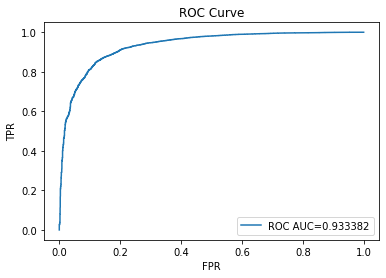

In [223]:
y_pred = clf.predict_proba(test[variables])[:, 1]

plot_metrics(test['signal'], y_pred)
test.shape, y_pred.shape

ROC AUC is just a part of the solution, you also have to make sure that

- the classifier output is not correlated with the mass
- classifier performs similarily on MC and real data of the normalization channel


### Mass correlation check

In [224]:
df_corr_check = pandas.read_csv("reference/check_correlation.csv")

In [225]:
df_corr_check.shape

(5514, 48)

In [226]:
y_pred = clf.predict(df_corr_check[variables])

In [227]:
 def efficiencies(features, thresholds=None, mask=None, bins=30, labels_dict=None, ignored_sideband=0.0,
                     errors=False, grid_columns=2):
        """
        Efficiencies for spectators
        :param features: using features (if None then use classifier's spectators)
        :type features: None or list[str]
        :param bins: bins for histogram
        :type bins: int or array-like
        :param mask: mask for data, which will be used
        :type mask: None or numbers.Number or array-like or str or function(pandas.DataFrame)
        :param list[float] thresholds: thresholds on prediction
        :param bool errors: if True then use errorbar, else interpolate function
        :param labels_dict: label -- name for class label
            if None then {0: 'bck', '1': 'signal'}
        :type labels_dict: None or OrderedDict(int: str)
        :param int grid_columns: count of columns in grid
        :param float ignored_sideband: (0, 1) percent of plotting data
        :rtype: plotting.GridPlot
        """
        mask, data, class_labels, weight = self._apply_mask(
            mask, self._get_features(features), self.target, self.weight)
        labels_dict = self._check_labels(labels_dict, class_labels)

        plots = []
        for feature in data.columns:
            for name, prediction in self.prediction.items():
                prediction = prediction[mask]
                eff = OrderedDict()
                for label, label_name in labels_dict.items():
                    label_mask = class_labels == label
                    eff[label_name] = utils.get_efficiencies(prediction[label_mask, label],
                                                             data[feature][label_mask].values,
                                                             bins_number=bins,
                                                             sample_weight=weight[label_mask],
                                                             thresholds=thresholds, errors=errors,
                                                             ignored_sideband=ignored_sideband)

                for label_name, eff_data in eff.items():
                    if errors:
                        plot_fig = plotting.ErrorPlot(eff_data)
                    else:
                        plot_fig = plotting.FunctionsPlot(eff_data)
                    plot_fig.xlabel = feature
                    plot_fig.ylabel = 'Efficiency for {}'.format(name)
                    plot_fig.title = '{} flatness'.format(label_name)
                    plot_fig.ylim = (0, 1)
                    plots.append(plot_fig)

        return plotting.GridPlot(grid_columns, *plots)

In [228]:
def check_arrays(*arrays):
    """
    Left for consistency, version of `sklearn.validation.check_arrays`
    :param list[iterable] arrays: arrays with same length of first dimension.
    """
    assert len(arrays) > 0, 'The number of array must be greater than zero'
    checked_arrays = []
    shapes = []
    for arr in arrays:
        if arr is not None:
            checked_arrays.append(numpy.array(arr))
            shapes.append(checked_arrays[-1].shape[0])
        else:
            checked_arrays.append(None)
    assert numpy.sum(numpy.array(shapes) == shapes[0]) == len(shapes), 'Different shapes of the arrays {}'.format(
        shapes)
    return checked_arrays

In [229]:
def get_efficiencies(prediction, spectator, sample_weight=None, bins_number=20,
                     thresholds=None, errors=False, ignored_sideband=0.0):
    """
    Construct efficiency function dependent on spectator for each threshold
    Different score functions available: Efficiency, Precision, Recall, F1Score,
    and other things from sklearn.metrics
    :param prediction: list of probabilities
    :param spectator: list of spectator's values
    :param bins_number: int, count of bins for plot
    :param thresholds: list of prediction's threshold
        (default=prediction's cuts for which efficiency will be [0.2, 0.4, 0.5, 0.6, 0.8])
    :return:
        if errors=False
        OrderedDict threshold -> (x_values, y_values)
        if errors=True
        OrderedDict threshold -> (x_values, y_values, y_err, x_err)
        All the parts: x_values, y_values, y_err, x_err are numpy.arrays of the same length.
    """
    prediction, spectator, sample_weight = \
        check_arrays(prediction, spectator, sample_weight)

    spectator_min, spectator_max = weighted_quantile(spectator, [ignored_sideband, (1. - ignored_sideband)])
    mask = (spectator >= spectator_min) & (spectator <= spectator_max)
    spectator = spectator[mask]
    prediction = prediction[mask]
    bins_number = min(bins_number, len(prediction))
    sample_weight = sample_weight if sample_weight is None else numpy.array(sample_weight)[mask]

    if thresholds is None:
        thresholds = [weighted_quantile(prediction, quantiles=1 - eff, sample_weight=sample_weight)
                      for eff in [0.2, 0.4, 0.5, 0.6, 0.8]]

    binner = Binner(spectator, bins_number=bins_number)
    if sample_weight is None:
        sample_weight = numpy.ones(len(prediction))
    bins_data = binner.split_into_bins(spectator, prediction, sample_weight)

    bin_edges = numpy.array([spectator_min] + list(binner.limits) + [spectator_max])
    xerr = numpy.diff(bin_edges) / 2.
    result = OrderedDict()
    for threshold in thresholds:
        x_values = []
        y_values = []
        N_in_bin = []
        for num, (masses, probabilities, weights) in enumerate(bins_data):
            y_values.append(numpy.average(probabilities > threshold, weights=weights))
            N_in_bin.append(numpy.sum(weights))
            if errors:
                x_values.append((bin_edges[num + 1] + bin_edges[num]) / 2.)
            else:
                x_values.append(numpy.mean(masses))

        x_values, y_values, N_in_bin = check_arrays(x_values, y_values, N_in_bin)
        if errors:
            result[threshold] = (x_values, y_values, numpy.sqrt(y_values * (1 - y_values) / N_in_bin), xerr)
        else:
            result[threshold] = (x_values, y_values)
    return result

In [230]:
def weighted_quantile(array, quantiles, sample_weight=None, array_sorted=False, old_style=False):
    """Computing quantiles of array. Unlike the numpy.percentile, this function supports weights,
    but it is inefficient and performs complete sorting.
    :param array: distribution, array of shape [n_samples]
    :param quantiles: floats from range [0, 1] with quantiles of shape [n_quantiles]
    :param sample_weight: optional weights of samples, array of shape [n_samples]
    :param array_sorted: if True, the sorting step will be skipped
    :param old_style: if True, will correct output to be consistent with numpy.percentile.
    :return: array of shape [n_quantiles]
    Example:
    >>> weighted_quantile([1, 2, 3, 4, 5], [0.5])
    Out: array([ 3.])
    >>> weighted_quantile([1, 2, 3, 4, 5], [0.5], sample_weight=[3, 1, 1, 1, 1])
    Out: array([ 2.])
    """
    array = numpy.array(array)
    quantiles = numpy.array(quantiles)
    sample_weight = check_sample_weight(array, sample_weight)
    assert numpy.all(quantiles >= 0) and numpy.all(quantiles <= 1), 'Percentiles should be in [0, 1]'

    if not array_sorted:
        array, sample_weight = reorder_by_first(array, sample_weight)

    weighted_quantiles = numpy.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= numpy.sum(sample_weight)
    return numpy.interp(quantiles, weighted_quantiles, array)


In [231]:
def check_sample_weight(y_true, sample_weight):
    """Checks the weights, if None, returns array.
    :param y_true: labels (or any array of length [n_samples])
    :param sample_weight: None or array of length [n_samples]
    :return: numpy.array of shape [n_samples]
    """
    if sample_weight is None:
        return numpy.ones(len(y_true), dtype=numpy.float)
    else:
        sample_weight = numpy.array(sample_weight, dtype=numpy.float)
        assert len(y_true) == len(sample_weight), \
            "The length of weights is different: not {0}, but {1}".format(len(y_true), len(sample_weight))
        return sample_weight



In [232]:

def reorder_by_first(*arrays):
    """
    Applies the same permutation to all passed arrays,
    permutation sorts the first passed array
    """
    arrays = check_arrays(*arrays)
    order = numpy.argsort(arrays[0])
    return [arr[order] for arr in arrays]

class Binner(object):
    def __init__(self, values, bins_number):
        """
        Binner is a class that helps to split the values into several bins.
        Initially an array of values is given, which is then splitted into 'bins_number' equal parts,
        and thus we are computing limits (boundaries of bins).
        """
        percentiles = [i * 100.0 / bins_number for i in range(1, bins_number)]
        self.limits = numpy.percentile(values, percentiles)

    def get_bins(self, values):
        """Given the values of feature, compute the index of bin
        :param values: array of shape [n_samples]
        :return: array of shape [n_samples]
        """
        return numpy.searchsorted(self.limits, values)

    def set_limits(self, limits):
        """Change the thresholds inside bins."""
        self.limits = limits

    @property
    def bins_number(self):
        """:return: number of bins"""
        return len(self.limits) + 1

    def split_into_bins(self, *arrays):
        """
        :param arrays: data to be splitted, the first array corresponds
        :return: sequence of length [n_bins] with values corresponding to each bin.
        """
        values = arrays[0]
        for array in arrays:
            assert len(array) == len(values), "passed arrays have different length"
        bins = self.get_bins(values)
        result = []
        for bin in range(len(self.limits) + 1):
            indices = bins == bin
            result.append([numpy.array(array)[indices] for array in arrays])
        return result
from collections import OrderedDict


In [233]:
eff = get_efficiencies(y_pred, df_corr_check.mass, thresholds=[0.5]) #, thresholds=[0.2, 0.4, 0.5, 0.6, 0.8])

<ipython-input-231-a99272aed22b>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return numpy.ones(len(y_true), dtype=numpy.float)


In [234]:
eff.keys()

odict_keys([0.5])

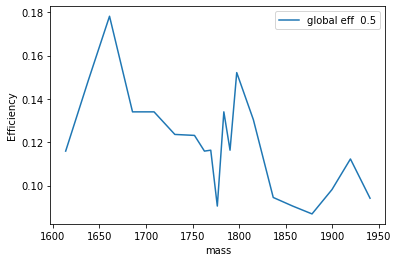

In [235]:
for label_name, eff_data in eff.items():
    pyplot.plot(eff_data[0], eff_data[1], label="global eff  %.1f" % label_name)
pyplot.xlabel('mass')
pyplot.ylabel('Efficiency')
pyplot.legend();

In [236]:
from utils import check_correlation

In [237]:
corr_metric = check_correlation(y_pred, df_corr_check['mass'])
print (corr_metric)

0.00013485436508509522


## MC vs Real difference

In [238]:
df_agreement = pandas.read_csv('reference/check_agreement.csv')

In [239]:

from sklearn.utils.validation import column_or_1d
def get_ks_metric(df_agree, df_test):
    sig_ind = df_agree[df_agree['signal'] == 1].index
    bck_ind = df_agree[df_agree['signal'] == 0].index

    mc_prob = numpy.array(df_test.loc[sig_ind]['prediction'])
    mc_weight = numpy.array(df_agree.loc[sig_ind]['weight'])
    data_prob = numpy.array(df_test.loc[bck_ind]['prediction'])
    data_weight = numpy.array(df_agree.loc[bck_ind]['weight'])
    val, agreement_metric = check_agreement_ks_sample_weighted(data_prob, mc_prob, data_weight, mc_weight)
    return agreement_metric['ks']

In [240]:
def check_agreement_ks_sample_weighted (data_prediction, mc_prediction, weights_data, weights_mc):
    data_prediction, weights_data = map(column_or_1d, [data_prediction, weights_data])
    mc_prediction, weights_mc = map(column_or_1d, [mc_prediction, weights_mc])

    assert numpy.all(data_prediction >= 0.) and numpy.all(data_prediction <= 1.), 'error in prediction'
    assert numpy.all(mc_prediction >= 0.) and numpy.all(mc_prediction <= 1.), 'error in prediction'

    weights_data = weights_data / numpy.sum(weights_data)
    weights_mc = weights_mc / numpy.sum(weights_mc)

    data_neg = data_prediction[weights_data < 0]
    weights_neg = -weights_data[weights_data < 0]
    mc_prediction = numpy.concatenate((mc_prediction, data_neg))
    weights_mc = numpy.concatenate((weights_mc, weights_neg))
    data_prediction = data_prediction[weights_data >= 0]
    weights_data = weights_data[weights_data >= 0]

    assert numpy.all(weights_data >= 0) and numpy.all(weights_mc >= 0)
    assert numpy.allclose(weights_data.sum(), weights_mc.sum())

    weights_data /= numpy.sum(weights_data)
    weights_mc /= numpy.sum(weights_mc)

    fpr, tpr, _ = roc_curve_splitted(data_prediction, mc_prediction, weights_data, weights_mc)

    Dnm = numpy.max(numpy.abs(fpr - tpr))
    Dnm_part = numpy.max(numpy.abs(fpr - tpr)[fpr + tpr < 1])

    result = {'ks': Dnm, 'ks_part': Dnm_part}
    return Dnm_part < 0.03, result

In [241]:
df_agreement.columns

Index(['id', 'LifeTime', 'dira', 'FlightDistance', 'FlightDistanceError', 'IP',
       'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree',
       'IP_p0p2', 'IP_p1p2', 'isolationa', 'isolationb', 'isolationc',
       'isolationd', 'isolatione', 'isolationf', 'iso', 'CDF1', 'CDF2', 'CDF3',
       'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof',
       'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP',
       'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p',
       'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta', 'SPDhits', 'signal',
       'weight'],
      dtype='object')

In [242]:
df_agreement[variables].head()

,LifeTime,isolationc,pt,DOCAthree,dira,p0_pt,p2_track_Chi2Dof,p1_IsoBDT,iso,p1_IPSig,...,SPDhits,p2_IP,p1_p,p0_eta,p1_pt,ISO_SumBDT,p2_eta,FlightDistance,p0_IsoBDT,p2_pt
0,0.001451,1,2251.611816,0.066887,0.999964,1438.064697,1.487057,-0.089797,4.0,10.732132,...,512,0.426797,6380.673828,2.666142,468.645721,-0.207475,3.594246,6.945030,-0.019306,834.562378
1,0.000679,17,10594.470703,0.001321,0.999818,316.791351,1.336784,-0.186370,3.0,16.435398,...,552,0.123877,64480.023438,2.995265,7547.703613,-0.659644,2.779366,9.468235,-0.278330,2861.309814
2,0.003027,1,2502.196289,0.005850,0.999847,1887.477905,0.798658,-0.131069,1.0,20.686119,...,318,1.290409,3921.181641,2.776633,317.579529,-0.399239,3.081832,13.280714,-0.115879,932.128235
3,0.000810,3,5097.813965,0.003864,0.999998,975.041687,0.938619,-0.177802,0.0,7.873435,...,290,0.166646,13221.149414,2.179345,1650.837524,-0.821041,2.918251,5.166821,-0.208248,2617.248291
4,0.000706,0,20388.097656,0.014612,0.999896,6035.000977,1.123868,-0.443564,0.0,18.738485,...,45,0.112430,46903.394531,2.196114,9657.492188,-1.116815,2.310401,10.897236,-0.328938,4763.682617


In [243]:
def compute_ks(data_prediction, mc_prediction, weights_data, weights_mc):
    """
    Compute Kolmogorov-Smirnov (ks) distance between real data predictions cdf and Monte Carlo one.
    :param data_prediction: array-like, real data predictions
    :param mc_prediction: array-like, Monte Carlo data predictions
    :param weights_data: array-like, real data weights
    :param weights_mc: array-like, Monte Carlo weights
    :return: ks value
    """
    assert len(data_prediction) == len(weights_data), 'Data length and weight one must be the same'
    assert len(mc_prediction) == len(weights_mc), 'Data length and weight one must be the same'

    data_prediction, mc_prediction = numpy.array(data_prediction), numpy.array(mc_prediction)
    weights_data, weights_mc = numpy.array(weights_data), numpy.array(weights_mc)

    assert numpy.all(data_prediction >= 0.) and numpy.all(data_prediction <= 1.), 'Data predictions are out of range [0, 1]'
    assert numpy.all(mc_prediction >= 0.) and numpy.all(mc_prediction <= 1.), 'MC predictions are out of range [0, 1]'

    weights_data /= numpy.sum(weights_data)
    weights_mc /= numpy.sum(weights_mc)

    fpr, tpr = __roc_curve_splitted(data_prediction, mc_prediction, weights_data, weights_mc)

    Dnm = numpy.max(numpy.abs(fpr - tpr))
    return Dnm

In [244]:
from sklearn.metrics import roc_curve
def __roc_curve_splitted(data_zero, data_one, sample_weights_zero, sample_weights_one):
    """
    Compute roc curve
    :param data_zero: 0-labeled data
    :param data_one:  1-labeled data
    :param sample_weights_zero: weights for 0-labeled data
    :param sample_weights_one:  weights for 1-labeled data
    :return: roc curve
    """
    labels = [0] * len(data_zero) + [1] * len(data_one)
    weights = numpy.concatenate([sample_weights_zero, sample_weights_one])
    data_all = numpy.concatenate([data_zero, data_one])
    fpr, tpr, _ = roc_curve(labels, data_all, sample_weight=weights)
    return fpr, tpr

In [245]:
agreement_probs = clf.predict_proba(df_agreement[variables])[:, 1]

ks = compute_ks(
    agreement_probs[df_agreement['signal'].values == 0],
    agreement_probs[df_agreement['signal'].values == 1],
    df_agreement[df_agreement['signal'] == 0]['weight'].values,
    df_agreement[df_agreement['signal'] == 1]['weight'].values)
print ('KS metric:', ks, "is OK:", ks < 0.09)

KS metric: 0.17763462462928964 is OK: False


In [246]:
def plot_ks(X_agreement, y_pred):
    sig_ind = X_agreement[X_agreement['signal'] == 1].index
    bck_ind = X_agreement[X_agreement['signal'] == 0].index

    mc_prob = y_pred[sig_ind]
    mc_weight = numpy.array(X_agreement.loc[sig_ind]['weight'])
    data_prob = y_pred[bck_ind]
    data_weight = numpy.array(X_agreement.loc[bck_ind]['weight'])
    inds = data_weight < 0
    mc_weight = numpy.array(list(mc_weight) + list(-data_weight[inds]))
    mc_prob = numpy.array(list(mc_prob) + list(data_prob[inds]))
    data_prob = data_prob[data_weight >= 0]
    data_weight = data_weight[data_weight >= 0]
    hist(data_prob, weights=data_weight, color='r', histtype='step', density=True, stacked=True, bins=60, label='data')
    hist(mc_prob, weights=mc_weight, color='b', histtype='step', density=True, stacked=True, bins=60, label='mc')
    xlabel("prediction")
    legend(loc=2)
    show()

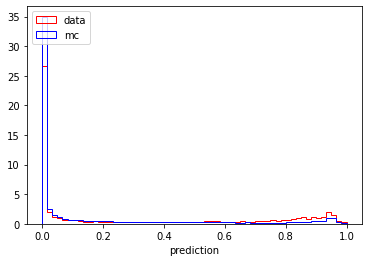

In [247]:
plot_ks(df_agreement, agreement_probs)

### Let's see if adding some noise can improve the agreement

In [284]:
def add_noise(array, level=0.15, random_seed=34):
    numpy.random.seed(random_seed)
    return level * numpy.random.random(size=array.size) + (1 - level) * array

In [285]:
agreement_probs_noise = add_noise(clf.predict_proba(df_agreement[variables])[:, 1])


In [286]:
ks_noise = compute_ks(
    agreement_probs_noise[df_agreement['signal'].values == 0],
    agreement_probs_noise[df_agreement['signal'].values == 1],
    df_agreement[df_agreement['signal'] == 0]['weight'].values,
    df_agreement[df_agreement['signal'] == 1]['weight'].values)
print ('KS metric:', ks_noise, "is OK:", ks_noise < 0.09)

KS metric: 0.1400890890851214 is OK: False


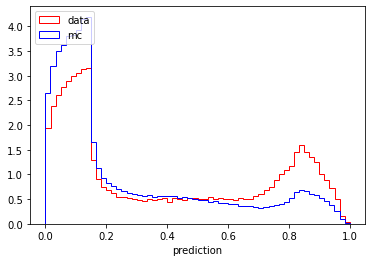

In [287]:
plot_ks(df_agreement, agreement_probs_noise)

### Check ROC with noise

In [262]:
test.shape

(20267, 51)

((20267, 51), (20267,))

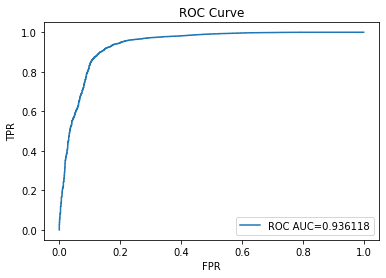

In [263]:
y_pred = add_noise(clf.predict_proba(test[variables])[:, 1])

plot_metrics(test['signal'], y_pred)
test.shape, y_pred.shape

# Train the model using the whole training sample

In [254]:
%time clf.fit(train_ada[variables], train_ada['signal'])

CPU times: user 2min 4s, sys: 6.33 ms, total: 2min 4s
Wall time: 2min 4s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features=32,
                                                         min_samples_leaf=46,
                                                         random_state=13),
                   learning_rate=0.005955266275358592, n_estimators=58,
                   random_state=13)

Compute prediction and add noise

In [255]:
y_pred = add_noise(clf.predict_proba(test_ada[variables])[:, 1])

# Prepare submission file

In [256]:
def save_submission(y_pred, index, filename='result'):
    sep = ','
    filename = '{}.csv.gz'.format(filename)
    pandas.DataFrame({'id': index, 'prediction': y_pred}).to_csv(
                filename, sep=sep, index=False, compression='gzip')
    print ("Saved file: ", filename, "\nShape:", (y_pred.shape[0], 2))
    return filename

In [257]:
save_submission(y_pred, test_ada.index, "sample_submission")

Saved file:  sample_submission.csv.gz 
Shape: (855819, 2)


'sample_submission.csv.gz'